In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "NanumGothic"

In [12]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "NanumGothic"
#matplotlib.rc('font',family='MalgunGothic')

In [13]:
df_fitness=pd.read_csv("C:/Users/소은/Desktop/Academy/빅데이터/Big Data 분석/FITNESS.csv", engine="python")
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


In [14]:
df_currency = pd.read_csv("C:/Users/소은/Desktop/Academy/빅데이터/Big Data 분석/환율.csv", engine="python", parse_dates=["APPL_DATE"])
df_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


In [15]:
# 그래프 분석 : bat chart

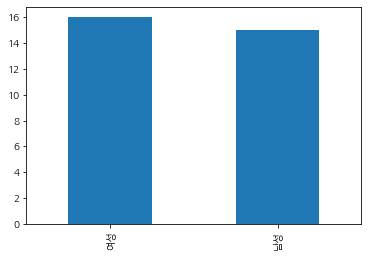

In [24]:
df_count=df_fitness["GENDER"].value_counts()
df_count.plot.bar()




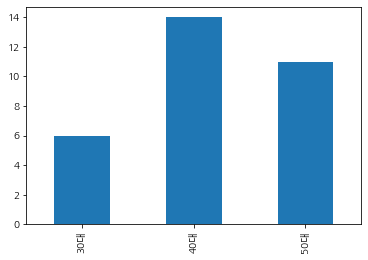

In [25]:

df_count = df_fitness["AGEGROUP"].value_counts()
df_count.sort_index(inplace=True);
df_count.plot.bar()

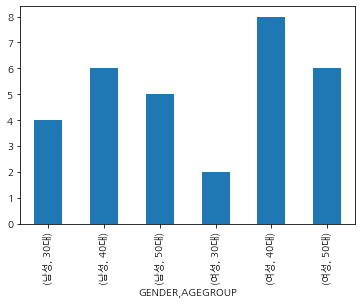

In [23]:
df_groupby_total=df_fitness.groupby(["GENDER","AGEGROUP"],as_index=False).size()
df_groupby_total.plot.bar()

In [18]:
# 그래프 분석 _Histogram

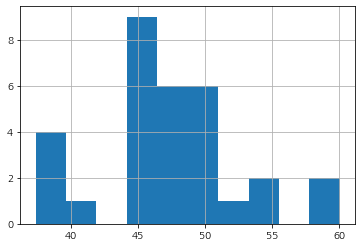

In [19]:
df_fitness["OXY"].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000295A9F96588>,
      dtype=object)

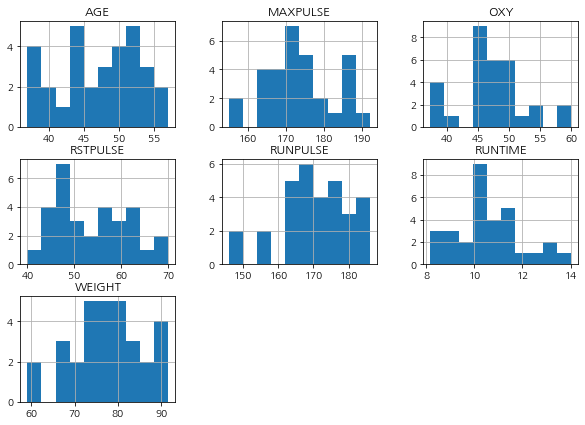

In [20]:
df_fitness.hist(figsize=(10,7))

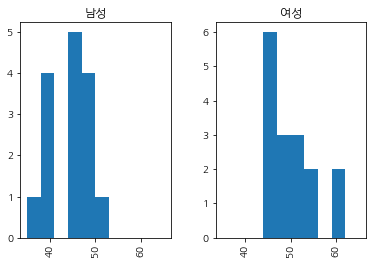

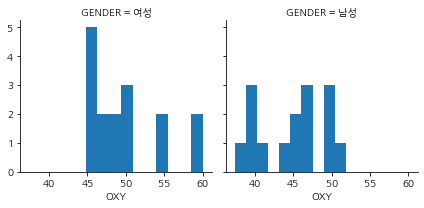

In [21]:
df_fitness.hist(column="OXY",by="GENDER",range=(35,65))
grid=sns.FacetGrid(df_fitness, col="GENDER")
grid.map(plt.hist,"OXY")

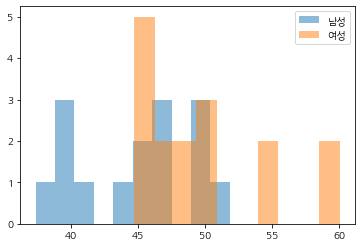

In [26]:
plt.hist(df_fitness[df_fitness["GENDER"]=="남성"]["OXY"],label="남성",alpha=0.5)
plt.hist(df_fitness[df_fitness["GENDER"]=="여성"]["OXY"],label="여성",alpha=0.5)
plt.legend()

(array([1., 3., 0., 1., 0., 0., 5., 4., 4., 2., 2., 4., 1., 0., 1., 1., 0.,
        0., 0., 2.]),
 array([37.388  , 38.52135, 39.6547 , 40.78805, 41.9214 , 43.05475,
        44.1881 , 45.32145, 46.4548 , 47.58815, 48.7215 , 49.85485,
        50.9882 , 52.12155, 53.2549 , 54.38825, 55.5216 , 56.65495,
        57.7883 , 58.92165, 60.055  ]),
 <a list of 20 Patch objects>)

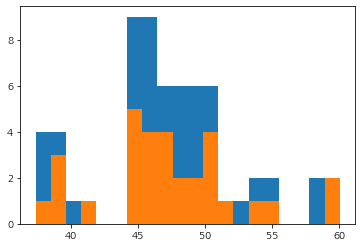

In [27]:
plt.hist(x="OXY",data=df_fitness)
plt.hist(x="OXY",data=df_fitness, bins=20)

In [28]:
# 그레프 분석 : box plot

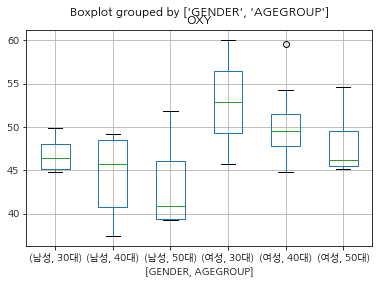

In [29]:
df_fitness.boxplot(column="OXY",by=["GENDER","AGEGROUP"])

In [30]:
# 그래프 분석 : pie chart

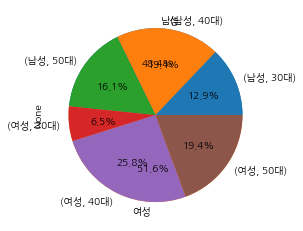

In [32]:
df_count=df_fitness.groupby(["GENDER"]).size()
df_count.plot.pie(y="OXY",autopct="%.1f%%")
df_count = df_fitness.groupby(["GENDER","AGEGROUP"]).size()
df_count.plot.pie(y="OXY",autopct="%.1f%%")

In [33]:
# 그래프 분석 : scatter plot

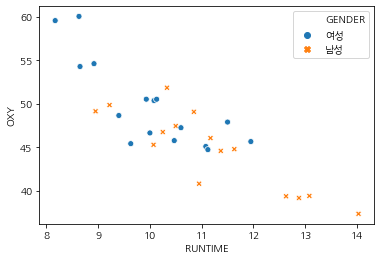

In [35]:
sns.scatterplot(x="RUNTIME",y="OXY",hue="GENDER",style="GENDER",data=df_fitness)

In [36]:
# 그래프 분석 : scatter matrix

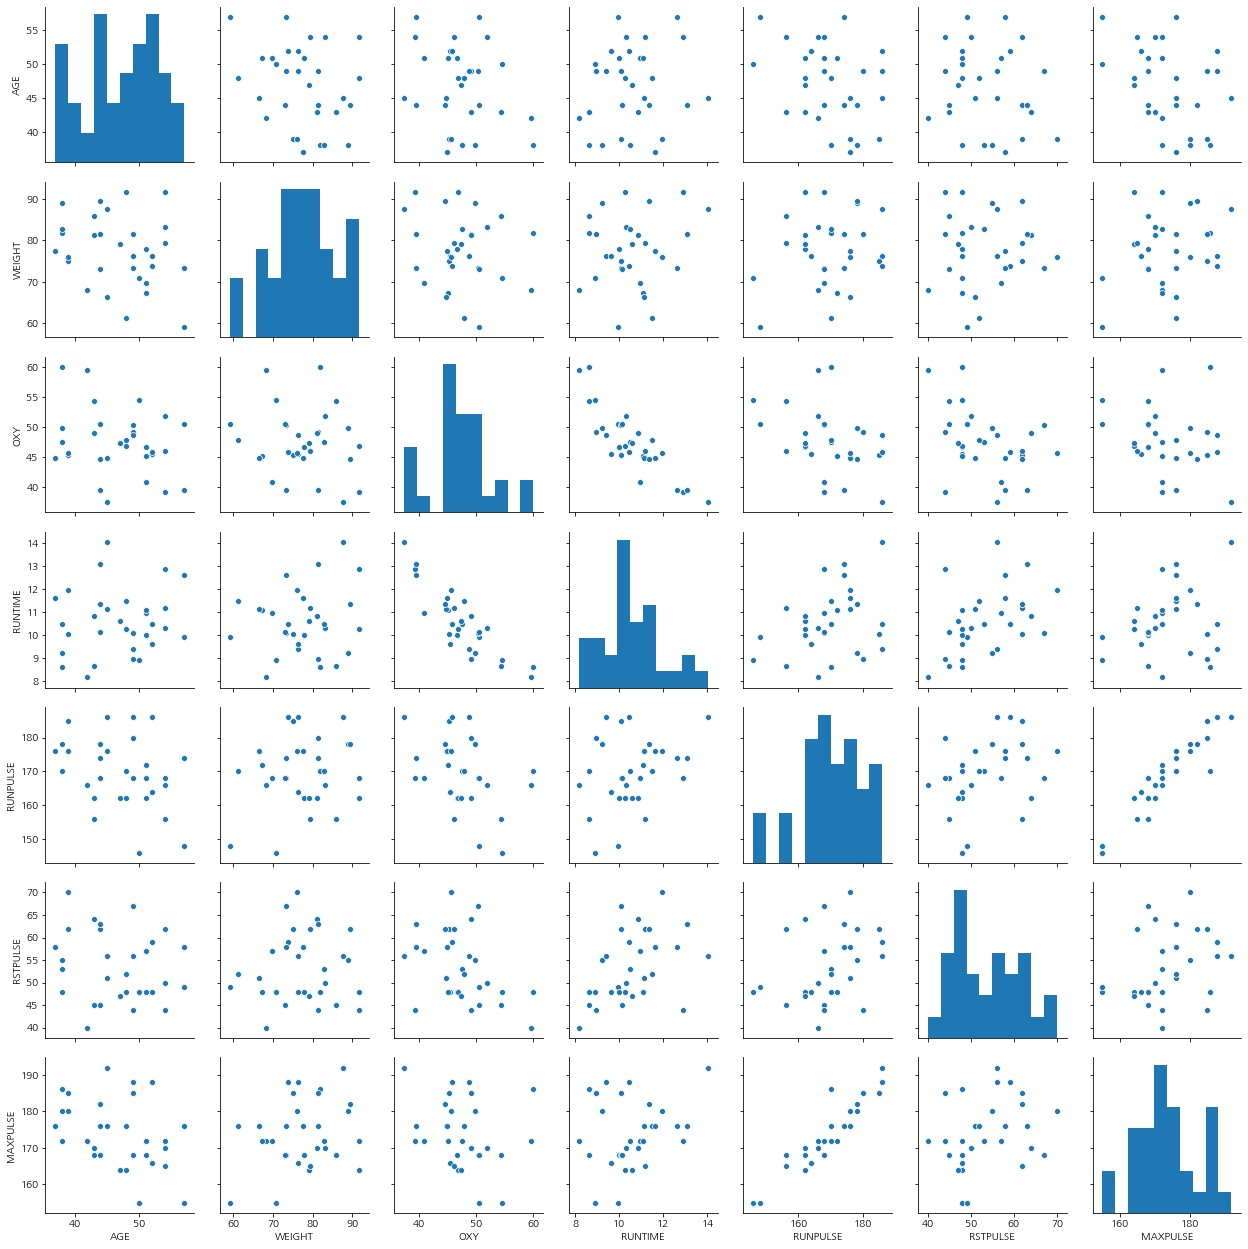

In [38]:
sns.pairplot(df_fitness)

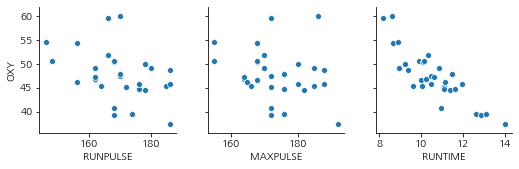

In [40]:
sns.pairplot(df_fitness, y_vars=["OXY"],x_vars=["RUNPULSE","MAXPULSE","RUNTIME"])

In [41]:
# 그래프 분석 : trend chart

In [42]:
df_currency_pivot = df_currency.pivot(index="APPL_DATE",columns="CURRENCY",values="STD_RATE")
df_currency_pivot.head()

CURRENCY,CNY,JPY,USD
APPL_DATE,,,
2016-01-01,181.48,976.99,1178.0
2016-01-02,181.48,976.99,1178.0
2016-01-03,181.48,976.99,1178.0
2016-01-04,181.10,992.62,1184.0
2016-01-05,181.94,993.00,1185.0


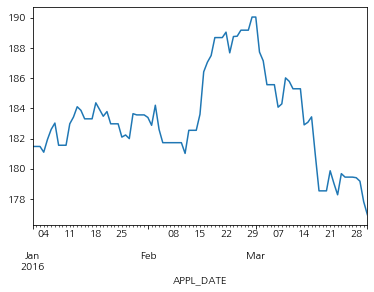

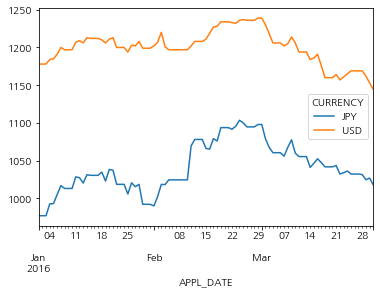

In [43]:
df_currency_pivot["CNY"].plot()
df_currency_pivot[["JPY","USD"]].plot()

In [44]:
# 그래프 분석 : heatmap

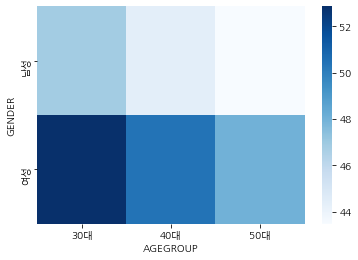

In [47]:
df_agg =df_fitness.groupby(["GENDER","AGEGROUP"],as_index=False).agg("mean")
df_pivot=df_agg.pivot("GENDER","AGEGROUP","OXY")
sns.heatmap(df_pivot,cmap="Blues")

In [48]:
# 그래프 분석: contour plot

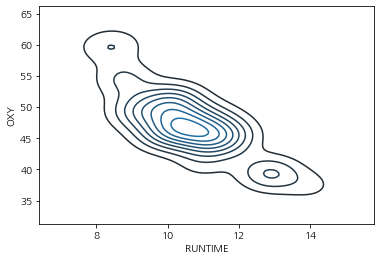

In [59]:
sns.kdeplot(df_fitness["RUNTIME"],df_fitness["OXY"],shade=False)  #True로 할 수 있음

In [51]:
# 그래프 분석 : parallel plot

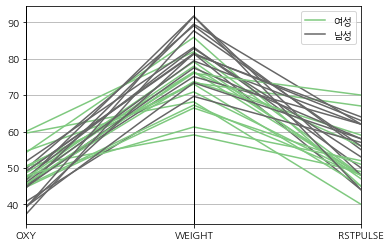

In [54]:
pd.plotting.parallel_coordinates(df_fitness, "GENDER",cols=["OXY","WEIGHT","RSTPULSE"],colormap="Accent")

In [55]:
# 그래프 분석 : customizing

Text(486.5477272727271, 0.5, '혈당 산소 요구량')

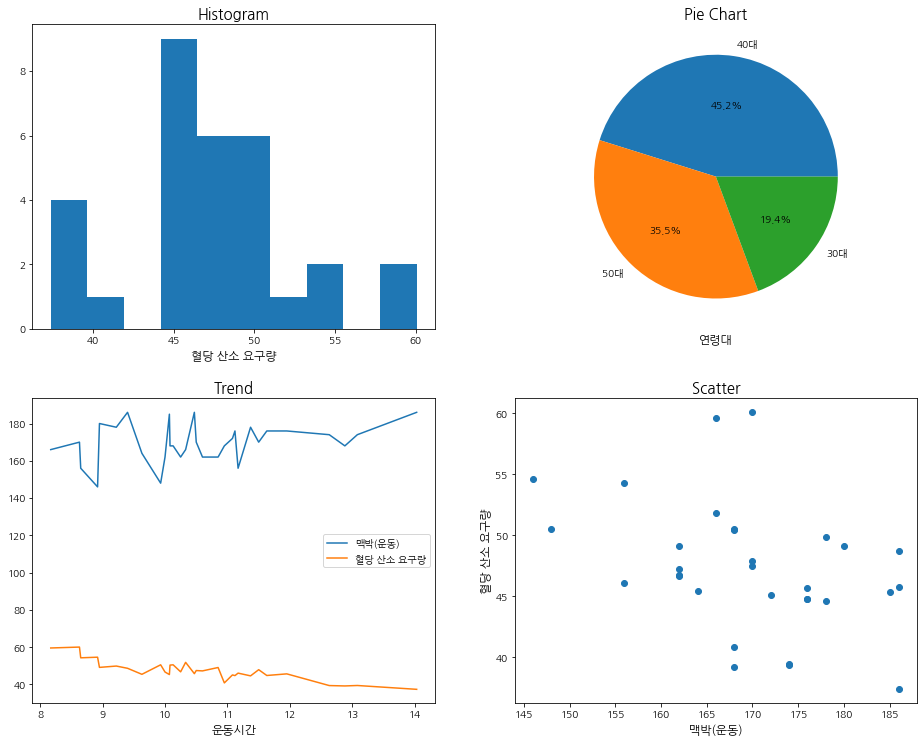

In [57]:
df_count=df_fitness["AGEGROUP"].value_counts()
fig, axes=plt.subplots(nrows=2, ncols=2, figsize=(13,10))
plt.tight_layout(w_pad=5,h_pad=5)

axes[0,0].hist(df_fitness["OXY"])
axes[0,0].set_title("Histogram", fontsize=15)
axes[0,0].set_xlabel("혈당 산소 요구량",fontsize=12)

axes[0,1].pie(df_count,labels=df_count.index.tolist(),autopct="%.1f%%")
axes[0,1].set_title("Pie Chart",fontsize=15)
axes[0,1].set_xlabel("연령대",fontsize=12)

axes[1,0].plot("RUNTIME","RUNPULSE",data=df_fitness, label="맥박(운동)")
axes[1,0].plot("RUNTIME","OXY",data=df_fitness, label="혈당 산소 요구량")
axes[1,0].set_title("Trend",fontsize=15)
axes[1,0].set_xlabel("운동시간",fontsize=12)
axes[1,0].legend()

axes[1,1].scatter("RUNPULSE","OXY",data=df_fitness)
axes[1,1].set_title("Scatter",fontsize=15)
axes[1,1].set_xlabel("맥박(운동)",fontsize=12)
axes[1,1].set_ylabel("혈당 산소 요구량",fontsize=12)